## **Proyek Analisis Data: Air Quality Dataset**
- **Nama:** Nuansa Syafrie Rahardian
- **Email:** nuansa.rahardian@mhs.unsoed.ac.id
- **ID Codingcamp:** mc229d5y1785

### Menentukan Pertanyaan Bisnis

*   Bagaimana tren polusi udara dari waktu ke waktu?
*   Pada musim apa tingkat polusi udara paling tinggi?
*   Bagaimana korelasi antara berbagai jenis polutan dengan faktor meteorologi (suhu, kelembaban, kecepatan angin, tekanan udara) ?



#### Import Library yang digunakan

In [40]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Get Data

### Dataset yang digunakan adalah Data Kota Nongzhanguan

In [41]:
# Load dataset
url = "https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv"
df = pd.read_csv(url)

# Menampilkan 5 data pertama
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


## Exploratory Data Analysis (EDA)

In [42]:
# Daftar kolom polutan yang akan diperiksa
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Menampilkan nilai minimum dan maksimum tiap polutan
for pollutant in pollutants:
    min_value = df[pollutant].min()
    max_value = df[pollutant].max()
    print(f"{pollutant}: Min = {min_value}, Max = {max_value}")

    median_values = df[pollutants].median()
    mean_values = df[pollutants].mean()

# Cetak hasil rata-rata
print("Rata-rata nilai untuk setiap polutan:")
print(mean_values)
# Cetak hasil median
print("Median nilai untuk setiap polutan:")
print(median_values)

PM2.5: Min = 2.0, Max = 844.0
PM10: Min = 2.0, Max = 995.0
SO2: Min = 0.5712, Max = 257.0
NO2: Min = 2.0, Max = 273.0
CO: Min = 100.0, Max = 10000.0
O3: Min = 0.2142, Max = 390.0
Rata-rata nilai untuk setiap polutan:
PM2.5      84.838483
PM10      108.991096
SO2        18.689242
NO2        58.097172
CO       1324.350198
O3         58.534682
dtype: float64
Median nilai untuk setiap polutan:
PM2.5     59.0
PM10      85.0
SO2        9.0
NO2       51.0
CO       900.0
O3        45.0
dtype: float64


In [43]:
# Melihat informasi dataset
df.info()

# Melihat jumlah missing values pada setiap kolom
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())

# Melihat statistik deskriptif dari data numerik
print("\nStatistik Deskriptif:")
print(df.describe())

# Menampilkan jumlah data duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

Jumlah missing values per kolom:
No            0
year          0
mo

## Prepare Data

In [64]:
# Menghapus kolom yang tidak diperlukan
df_clean = df.drop(columns=["No", "station"], errors='ignore')

# Menampilkan informasi dataset setelah penghapusan kolom
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   PM2.5   34436 non-null  float64
 5   PM10    34624 non-null  float64
 6   SO2     34618 non-null  float64
 7   NO2     34372 non-null  float64
 8   CO      33858 non-null  float64
 9   O3      34558 non-null  float64
 10  TEMP    35044 non-null  float64
 11  PRES    35044 non-null  float64
 12  DEWP    35044 non-null  float64
 13  RAIN    35044 non-null  float64
 14  wd      34986 non-null  object 
 15  WSPM    35050 non-null  float64
dtypes: float64(11), int64(4), object(1)
memory usage: 4.3+ MB


In [65]:
# Menggunakan interpolasi linier untuk mengisi nilai yang hilang
df_clean = df_clean.interpolate(method='linear')

# Menampilkan jumlah missing values setelah interpolasi
print("Jumlah missing values setelah interpolasi:")
print(df_clean.isnull().sum())


Jumlah missing values setelah interpolasi:
year      0
month     0
day       0
hour      0
PM2.5     0
PM10      0
SO2       0
NO2       0
CO        0
O3        0
TEMP      0
PRES      0
DEWP      0
RAIN      0
wd       78
WSPM      0
dtype: int64


<ipython-input-65-dabd6cbed853>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_clean = df_clean.interpolate(method='linear')


In [66]:
# Mengisi nilai yang hilang di kolom 'wd' dengan modus (nilai yang paling sering muncul)
df_clean["wd"].fillna(df_clean["wd"].mode()[0], inplace=True)

# Menampilkan jumlah missing values setelah pengisian
print("Jumlah missing values setelah pengisian pada kolom kategori:")
print(df_clean.isnull().sum())


Jumlah missing values setelah pengisian pada kolom kategori:
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64


<ipython-input-66-cf2f440b4188>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["wd"].fillna(df_clean["wd"].mode()[0], inplace=True)


In [67]:
# Fungsi untuk menentukan musim berdasarkan bulan
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

# Menambahkan kolom 'season' berdasarkan bulan
df_clean["season"] = df_clean["month"].apply(get_season)

# Menampilkan jumlah data per musim
print(df_clean["season"].value_counts())

# Menampilkan 5 baris pertama setelah penambahan kolom 'season'
df_clean.head()


season
Spring    8832
Summer    8832
Autumn    8736
Winter    8664
Name: count, dtype: int64


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,season
0,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Spring
1,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Spring
2,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Spring
3,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Spring
4,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Spring


In [68]:
df_clean["datetime"] = pd.to_datetime(df_clean[["year", "month", "day", "hour"]])
df_clean.set_index("datetime", inplace=True)

df_clean.head()


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,season
datetime,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Spring
2013-03-01 01:00:00,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Spring
2013-03-01 02:00:00,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Spring
2013-03-01 03:00:00,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Spring
2013-03-01 04:00:00,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Spring


In [58]:
df_clean.reset_index(inplace=True)  # Mengembalikan 'datetime' sebagai kolom biasa
df_clean.to_csv("data_cleaned.csv", index=False)  # Menyimpan CSV dengan datetime tetap ada sebagai kolom


In [59]:
from google.colab import files
files.download("data_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Analayze Data

### 1. Bagaimana tren polusi udara dari waktu ke waktu?

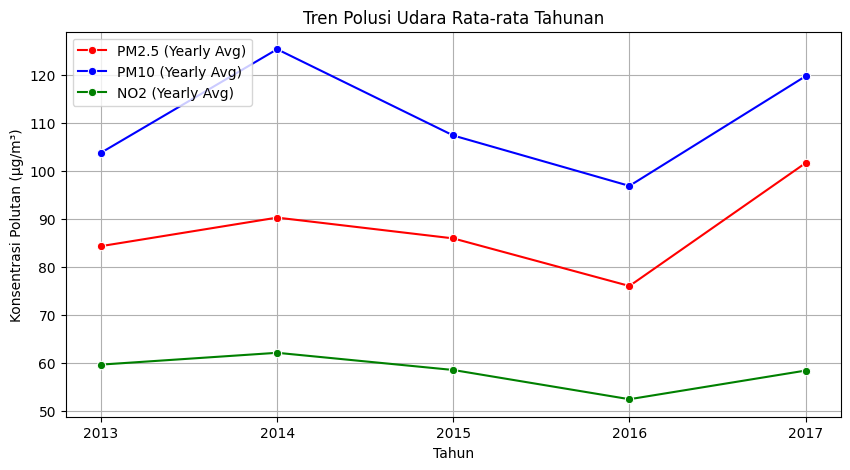

In [70]:
# Hitung rata-rata tahunan untuk setiap polutan
df_yearly = df.groupby('year')[["PM2.5", "PM10", "NO2"]].mean().reset_index()

# Visualisasi tren tahunan
plt.figure(figsize=(10, 5))

sns.lineplot(data=df_yearly, x="year", y="PM2.5", label="PM2.5 (Yearly Avg)", color="red", marker="o")
sns.lineplot(data=df_yearly, x="year", y="PM10", label="PM10 (Yearly Avg)", color="blue", marker="o")
sns.lineplot(data=df_yearly, x="year", y="NO2", label="NO2 (Yearly Avg)", color="green", marker="o")

plt.title("Tren Polusi Udara Rata-rata Tahunan")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi Polutan (µg/m³)")
plt.xticks(df_yearly["year"])  # Menyesuaikan tick agar sesuai dengan tahun
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-65-88744b9f5141>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="season", y="PM2.5", palette="coolwarm")


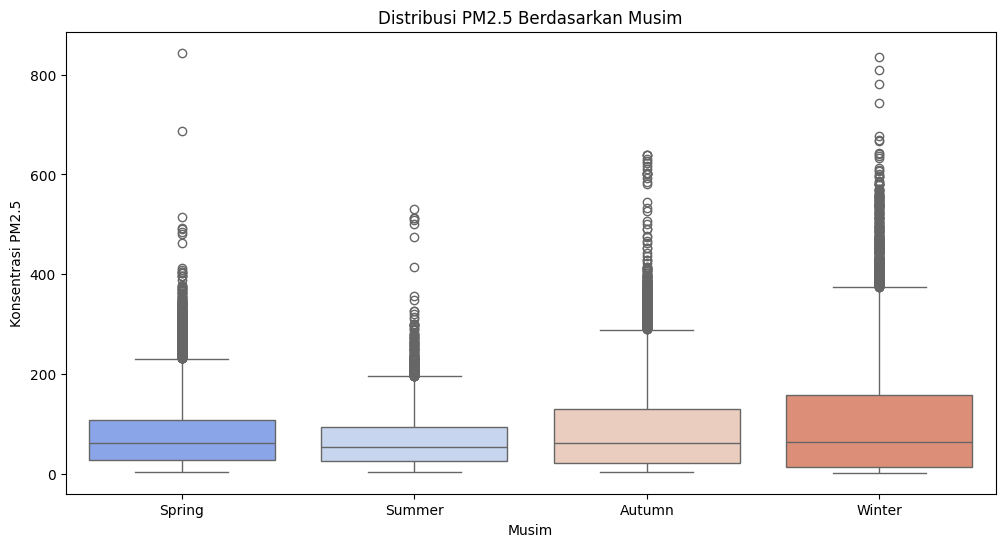

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x="season", y="PM2.5", palette="coolwarm")
plt.title("Distribusi PM2.5 Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Konsentrasi PM2.5")
plt.show()


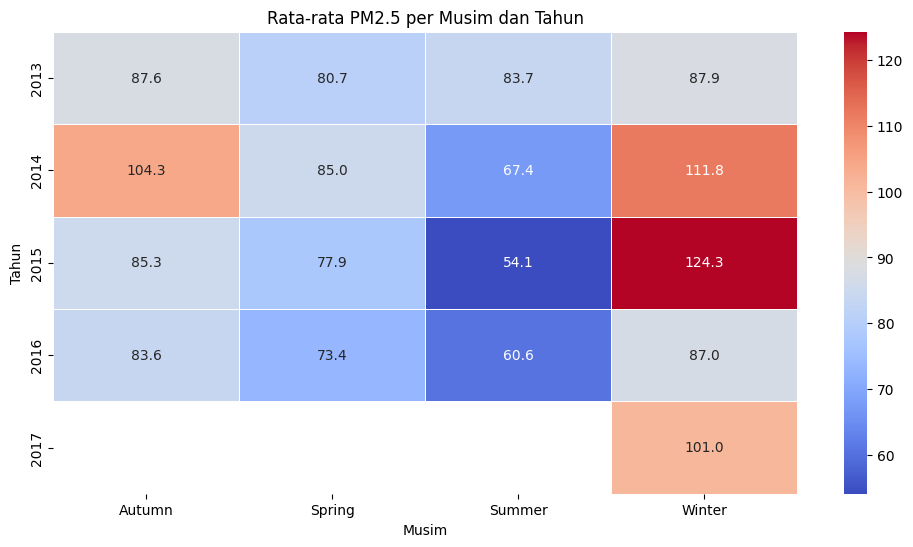

In [75]:
# Mengelompokkan data berdasarkan tahun dan musim
df_clean["year"] = df_clean.index.year
season_pivot = df_clean.pivot_table(index="year", columns="season", values="PM2.5", aggfunc="mean")

# Membuat heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(season_pivot, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)

# Memberi label
plt.title("Rata-rata PM2.5 per Musim dan Tahun")
plt.xlabel("Musim")
plt.ylabel("Tahun")

# Menampilkan plot
plt.show()


In [25]:
# Pilih kolom yang relevan (polutan + faktor cuaca)
columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "WSPM"]
df_corr = df_clean[columns].corr()

# Menampilkan tabel korelasi
df_corr


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,WSPM
PM2.5,1.000000,0.903852,0.536543,0.691340,0.813697,-0.187629,-0.173362,-0.301098
PM10,0.903852,1.000000,0.524449,0.676476,0.741651,-0.160814,-0.145445,-0.205768
SO2,0.536543,0.524449,1.000000,0.502287,0.563784,-0.192710,-0.360466,-0.155726
NO2,0.691340,0.676476,0.502287,1.000000,0.702669,-0.521079,-0.302299,-0.467683
CO,0.813697,0.741651,0.563784,0.702669,1.000000,-0.313067,-0.317610,-0.338262
O3,-0.187629,-0.160814,-0.192710,-0.521079,-0.313067,1.000000,0.609599,0.312668
TEMP,-0.173362,-0.145445,-0.360466,-0.302299,-0.317610,0.609599,1.000000,0.048800
WSPM,-0.301098,-0.205768,-0.155726,-0.467683,-0.338262,0.312668,0.048800,1.000000


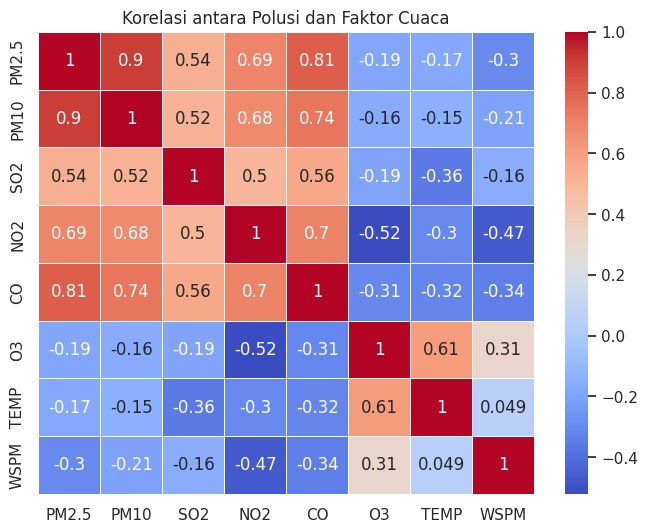

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi antara Polusi dan Faktor Cuaca")
plt.show()
